In [7]:
import numpy as np
import pandas as pd

In [8]:
credit2=pd.ExcelFile("credit2.xlsx")
frameCredit2=credit2.parse()
frameCredit1=pd.read_table("credit1.txt")
frameCreditGlobal=pd.merge(frameCredit1,frameCredit2,how='left')

In [76]:
from sklearn.cross_validation import train_test_split
X, y = frameCreditGlobal[["Income","Number_of_Products",]].values, frameCreditGlobal["Homeowner"]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    stratify=frameCreditGlobal["Gender"])

In [32]:
X_train["Gender"].value_counts()

M    681
F    659
Name: Gender, dtype: int64

In [33]:
frameCreditGlobal["Gender"].value_counts()


M    1017
F     983
Name: Gender, dtype: int64

In [57]:
from sklearn.cross_validation import KFold
kf = KFold(len(y), n_folds=5)

5

In [77]:
for train_index, test_index in kf:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [63]:
from sklearn.metrics import mean_squared_error 
RMSE = mean_squared_error(frameCreditGlobal["Income"], frameCreditGlobal["Income"])**0.5
RMSE

0.0

In [80]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold
%matplotlib inline

In [81]:
n_samples, n_features = X.shape

cv = StratifiedKFold(y, n_folds=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

In [87]:
y=np.where(y=="T",1,0)

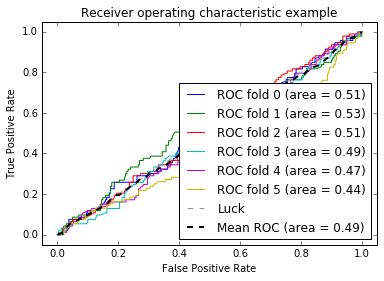

In [89]:
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
